<a href="https://colab.research.google.com/github/gencross/CollatzGroup3/blob/main/MilesCollatzNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def collatz_verbose(n):
  '''
  Prints the orbit of n
  '''
  while abs(n) != 1: #check if n has reached 1 or -1
    print(n)
    if n % 2 == 0: #if n is even, divide by 2 and repeat
      n //= 2
    else: #if n is odd, do 3n+1 and repeat
      n = (3 * n + 1)
  return

In [ ]:
def collatz_iterations(n):
  '''
  Return how many iterations it takes for
  n to go to 1
  '''
  iterations = 0
  while n != 1:
    if n % 2 == 0:
      n //= 2
    else:
      n = (3 * n + 1) // 2
    iterations += 1
  return iterations

In [ ]:
def collatz_check(n):
  '''
  Returns True if n passes
  the Collatz conjecture
  '''
  while n != 1:
    if n % 2 == 0:
      n //= 2
    else:
      n = (3 * n + 1) // 2
  return True

In [ ]:
for i in range(2,10**5):
  if collatz_check(i) != True:
    print("Fields Medal!!!", i)
print("Check complete.")    

Check complete.


In [ ]:
def find_max_iter(n):
  '''
  Checks for the number with the longest orbit
  up to n. Returns a tuple. The first value is
  the number, the second value is the number of 
  iterations.
  '''
  max_iter = 0
  max_iter_n = 0
  for i in range(2,n+1):
    i_iter = collatz_iterations(i)
    if i_iter > max_iter:
      max_iter = i_iter
      max_iter_n = i
  return max_iter_n, max_iter

In [ ]:
find_max_iter(10**5)

(77031, 221)

In [ ]:
#collatz_verbose(77031)

In [ ]:
def better_check(n):
  for i in range(3,n+1,2):
    c = i
    while c >= i:
      if c % 2 == 0:
        c //= 2
      if c % 2 == 1:
        c = (3 * c + 1) // 2
  print("Verified up to {}".format(n))


In [ ]:
better_check(10**9)

Verified up to 1000000000


In [1]:
def sigma(n):
  '''
  Finds and returns the "dropping time" of n.
  This is the number of 3n+1 loops that it takes
  for n to become less than where it started.
  '''
  i = n # i will be the variable that changes
  loops = 0 # track the dropping time here
  while i >= n: # stop when i < n
    if i % 2 == 0:
      i //= 2
      loops += 1
    else:
      i = (3 * i + 1) // 2
      loops += 2 # We can combine 2 steps in to one here since 3i+1 is always even
  return loops

In [24]:
def best_sigmas(n):
  '''
  Creates and returns a list all positive ints
  less than or equal to n whose dropping time
  is greater than the dropping times of all
  smaller positive ints. Also returns the dropping
  times.
  '''
  int_list = [2]
  sigma_list = [1] # initialize at 2 and start checking at 3
  for i in range(3,n+1,2):
    sig_i = sigma(i) # save this as a variable so we don't have to run it twice
    if sig_i > sigma_list[-1]:
      int_list.append(i)
      sigma_list.append(sig_i)
  return int_list,sigma_list

In [29]:
best_sigmas(10**5)

([2, 3, 7, 27, 703, 10087, 35655], [1, 6, 11, 96, 132, 171, 220])

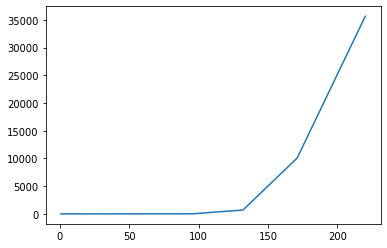

In [33]:
import matplotlib.pyplot as plt
my_list = best_sigmas(10**5)
plt.plot(my_list[1],my_list[0])